 ## Observations and Insights
 * There were no missing or null nubers found within the combined mouse metadata and study results
 * Droping duplicate values eliminated all of the rows except for 10 of them. I was ab;le to use (subset=['Timepoint'] to isolate and eliminate the rows with redundat Timepoints
 * In the summary statistics generated for the Drug regimens, Capomulin and Rmicane recieved the most treatments of all the drug regimens. The mean is normally distributed and forms a relative normal bell curve. Ramicane seemed to be the closest to Capomulin in distance from the mean and variance
 * The Bar Charts of drug regimens (x) and counts of measures (y) werer identical between the Pandas plot and the matplotlib charts. Pandas was easier to generate.
 * The Pie Charts of drug regimens (x) and counts of measures (y) werer identical between the Pandas plot and the matplotlib charts. Pandas was easier to generate.
 * 'The top five of the most pomising drug regimens, Capomulin, Ramicane, Infubinol, and Ceftamin, were reviewed by Mouse ID, Weight (g), Timepoint, and Tumor Volume (mm3). Ramicane appears to be the closest in efficacy compared to Capomulin in reducing tumor volume in the mice
 * The boxplots for drug regimens shows the only outlier in the Infubinol data even though the IRQ calculations indicates that none of the values for for upper and lower bounds are exceeded by any of the drug regimens
 * The correlation heatmap indicates a strong positive correalation between mouse weight and Tumor Volume in the selcted mouse (s185), which was in the base drug regimen Capomulin trial. The recommendation is to conduct a correlation analysis between mice in the Capomulin regimen and the Ramicane regimen
 * The correlation and regression analysis for Capomulin indicate a stron positive correlation between mouse weight and tumor volume (reduction) for the drug regimen Capomulin:
 slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pearsonsr (Correlation coefficient):0.84
r-squared:0.7088568047708717
stderr:0.12754359033201337
y  = 0.95x + 21.55

Recommendation: The closest drug regimen performance to Capomulin was the Ramicane drug regimen. Futher analysis of Ramicane is recommended 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import pandas as pd
from sklearn import datasets
import numpy as np
import seaborn as sns


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [2]:
study_results = pd.read_csv(study_results_path)
study_results.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [3]:
# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_study_data.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [4]:
# Data Clean: Remove duplicate timepoint and associated data with that Mouse ID
combined_study_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [5]:
# Missing/Null Values
combined_study_data.isnull().sum()

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [6]:
# Descriptive Statistics
combined_study_data.describe()

Age_months   Weight (g)    Timepoint  Tumor Volume (mm3)  \
count  1893.000000  1893.000000  1893.000000         1893.000000   
mean     12.814580    25.662441    19.572108           50.448381   
std       7.189592     3.921622    14.079460            8.894722   
min       1.000000    15.000000     0.000000           22.050126   
25%       7.000000    25.000000     5.000000           45.000000   
50%      13.000000    27.000000    20.000000           48.951474   
75%      20.000000    29.000000    30.000000           56.292200   
max      24.000000    30.000000    45.000000           78.567014   

       Metastatic Sites  
count       1893.000000  
mean           1.021659  
std            1.137974  
min            0.000000  
25%            0.000000  
50%            1.000000  
75%            2.000000  
max            4.000000

In [7]:
# Data Quality - I need to change the Timepoint datatype to float instead of int64...I didn't need to do this, but it was good to learn how to do this if I needed
combined_study_data.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [8]:
# Drop Duplicate TimePoints: I need to change the Timepoint datatype to float instead of Int64
combined_study_data.drop_duplicates(subset=['Timepoint'], keep =False, inplace =False)
combined_study_data

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_df = pd.DataFrame(combined_study_data.groupby("Drug Regimen").count())
drug_regimen_df


Mouse ID  Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen                                                     
Capomulin          230  230         230         230        230   
Ceftamin           178  178         178         178        178   
Infubinol          178  178         178         178        178   
Ketapril           188  188         188         188        188   
Naftisol           186  186         186         186        186   
Placebo            181  181         181         181        181   
Propriva           161  161         161         161        161   
Ramicane           228  228         228         228        228   
Stelasyn           181  181         181         181        181   
Zoniferol          182  182         182         182        182   

              Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen                                        
Capomulin                    230               230  
Ceftamin                     178               178  
Infubinol                    178               178  
Ketapril                     188               188  
Naftisol                     186               186  
Placebo                      181               181  
Propriva                     161               161  
Ramicane                     228               228  
Stelasyn                     181               181  
Zoniferol                    182               182

In [10]:
summary_stats_df = pd.DataFrame(combined_study_data.groupby("Drug Regimen").count())
summary_stats_df

Mouse ID  Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen                                                     
Capomulin          230  230         230         230        230   
Ceftamin           178  178         178         178        178   
Infubinol          178  178         178         178        178   
Ketapril           188  188         188         188        188   
Naftisol           186  186         186         186        186   
Placebo            181  181         181         181        181   
Propriva           161  161         161         161        161   
Ramicane           228  228         228         228        228   
Stelasyn           181  181         181         181        181   
Zoniferol          182  182         182         182        182   

              Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen                                        
Capomulin                    230               230  
Ceftamin                     178               178  
Infubinol                    178               178  
Ketapril                     188               188  
Naftisol                     186               186  
Placebo                      181               181  
Propriva                     161               161  
Ramicane                     228               228  
Stelasyn                     181               181  
Zoniferol                    182               182

In [11]:
summary_stats_df["Mean"]=pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary_stats_df

Mouse ID  Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen                                                     
Capomulin          230  230         230         230        230   
Ceftamin           178  178         178         178        178   
Infubinol          178  178         178         178        178   
Ketapril           188  188         188         188        188   
Naftisol           186  186         186         186        186   
Placebo            181  181         181         181        181   
Propriva           161  161         161         161        161   
Ramicane           228  228         228         228        228   
Stelasyn           181  181         181         181        181   
Zoniferol          182  182         182         182        182   

              Tumor Volume (mm3)  Metastatic Sites       Mean  
Drug Regimen                                                   
Capomulin                    230               230  40.675741  
Ceftamin                     178               178  52.591172  
Infubinol                    178               178  52.884795  
Ketapril                     188               188  55.235638  
Naftisol                     186               186  54.331565  
Placebo                      181               181  54.033581  
Propriva                     161               161  52.322552  
Ramicane                     228               228  40.216745  
Stelasyn                     181               181  54.233149  
Zoniferol                    182               182  53.236507

<function matplotlib.pyplot.show(close=None, block=None)>

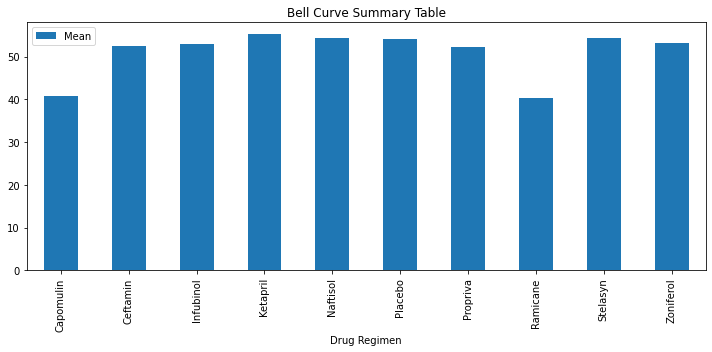

In [53]:
summary_mean = summary_stats_df[['Mean']]

bell_curve = summary_mean.plot(kind="bar", figsize=(10,5))
plt.title("Bell Curve Summary Table")

# Set the xlabel and ylabel
measures.set_xlabel("Drug Regimen")
measures.set_ylabel("Mean")
plt.tight_layout()

plt.show

In [12]:
summary_stats_df["Median"]=pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary_stats_df

Mouse ID  Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen                                                     
Capomulin          230  230         230         230        230   
Ceftamin           178  178         178         178        178   
Infubinol          178  178         178         178        178   
Ketapril           188  188         188         188        188   
Naftisol           186  186         186         186        186   
Placebo            181  181         181         181        181   
Propriva           161  161         161         161        161   
Ramicane           228  228         228         228        228   
Stelasyn           181  181         181         181        181   
Zoniferol          182  182         182         182        182   

              Tumor Volume (mm3)  Metastatic Sites       Mean     Median  
Drug Regimen                                                              
Capomulin                    230               230  40.675741  41.557809  
Ceftamin                     178               178  52.591172  51.776157  
Infubinol                    178               178  52.884795  51.820584  
Ketapril                     188               188  55.235638  53.698743  
Naftisol                     186               186  54.331565  52.509285  
Placebo                      181               181  54.033581  52.288934  
Propriva                     161               161  52.322552  50.854632  
Ramicane                     228               228  40.216745  40.673236  
Stelasyn                     181               181  54.233149  52.431737  
Zoniferol                    182               182  53.236507  51.818479

In [13]:
summary_stats_df["Variance"]=pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary_stats_df

Mouse ID  Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen                                                     
Capomulin          230  230         230         230        230   
Ceftamin           178  178         178         178        178   
Infubinol          178  178         178         178        178   
Ketapril           188  188         188         188        188   
Naftisol           186  186         186         186        186   
Placebo            181  181         181         181        181   
Propriva           161  161         161         161        161   
Ramicane           228  228         228         228        228   
Stelasyn           181  181         181         181        181   
Zoniferol          182  182         182         182        182   

              Tumor Volume (mm3)  Metastatic Sites       Mean     Median  \
Drug Regimen                                                               
Capomulin                    230               230  40.675741  41.557809   
Ceftamin                     178               178  52.591172  51.776157   
Infubinol                    178               178  52.884795  51.820584   
Ketapril                     188               188  55.235638  53.698743   
Naftisol                     186               186  54.331565  52.509285   
Placebo                      181               181  54.033581  52.288934   
Propriva                     161               161  52.322552  50.854632   
Ramicane                     228               228  40.216745  40.673236   
Stelasyn                     181               181  54.233149  52.431737   
Zoniferol                    182               182  53.236507  51.818479   

               Variance  
Drug Regimen             
Capomulin     24.947764  
Ceftamin      39.290177  
Infubinol     43.128684  
Ketapril      68.553577  
Naftisol      66.173479  
Placebo       61.168083  
Propriva      42.351070  
Ramicane      23.486704  
Stelasyn      59.450562  
Zoniferol     48.533355

In [14]:
summary_stats_df["STD"]=pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary_stats_df

Mouse ID  Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen                                                     
Capomulin          230  230         230         230        230   
Ceftamin           178  178         178         178        178   
Infubinol          178  178         178         178        178   
Ketapril           188  188         188         188        188   
Naftisol           186  186         186         186        186   
Placebo            181  181         181         181        181   
Propriva           161  161         161         161        161   
Ramicane           228  228         228         228        228   
Stelasyn           181  181         181         181        181   
Zoniferol          182  182         182         182        182   

              Tumor Volume (mm3)  Metastatic Sites       Mean     Median  \
Drug Regimen                                                               
Capomulin                    230               230  40.675741  41.557809   
Ceftamin                     178               178  52.591172  51.776157   
Infubinol                    178               178  52.884795  51.820584   
Ketapril                     188               188  55.235638  53.698743   
Naftisol                     186               186  54.331565  52.509285   
Placebo                      181               181  54.033581  52.288934   
Propriva                     161               161  52.322552  50.854632   
Ramicane                     228               228  40.216745  40.673236   
Stelasyn                     181               181  54.233149  52.431737   
Zoniferol                    182               182  53.236507  51.818479   

               Variance       STD  
Drug Regimen                       
Capomulin     24.947764  4.994774  
Ceftamin      39.290177  6.268188  
Infubinol     43.128684  6.567243  
Ketapril      68.553577  8.279709  
Naftisol      66.173479  8.134708  
Placebo       61.168083  7.821003  
Propriva      42.351070  6.507770  
Ramicane      23.486704  4.846308  
Stelasyn      59.450562  7.710419  
Zoniferol     48.533355  6.966589

In [15]:
summary_stats_df["SEM"]=pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
summary_stats_df

Mouse ID  Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen                                                     
Capomulin          230  230         230         230        230   
Ceftamin           178  178         178         178        178   
Infubinol          178  178         178         178        178   
Ketapril           188  188         188         188        188   
Naftisol           186  186         186         186        186   
Placebo            181  181         181         181        181   
Propriva           161  161         161         161        161   
Ramicane           228  228         228         228        228   
Stelasyn           181  181         181         181        181   
Zoniferol          182  182         182         182        182   

              Tumor Volume (mm3)  Metastatic Sites       Mean     Median  \
Drug Regimen                                                               
Capomulin                    230               230  40.675741  41.557809   
Ceftamin                     178               178  52.591172  51.776157   
Infubinol                    178               178  52.884795  51.820584   
Ketapril                     188               188  55.235638  53.698743   
Naftisol                     186               186  54.331565  52.509285   
Placebo                      181               181  54.033581  52.288934   
Propriva                     161               161  52.322552  50.854632   
Ramicane                     228               228  40.216745  40.673236   
Stelasyn                     181               181  54.233149  52.431737   
Zoniferol                    182               182  53.236507  51.818479   

               Variance       STD       SEM  
Drug Regimen                                 
Capomulin     24.947764  4.994774  0.329346  
Ceftamin      39.290177  6.268188  0.469821  
Infubinol     43.128684  6.567243  0.492236  
Ketapril      68.553577  8.279709  0.603860  
Naftisol      66.173479  8.134708  0.596466  
Placebo       61.168083  7.821003  0.581331  
Propriva      42.351070  6.507770  0.512884  
Ramicane      23.486704  4.846308  0.320955  
Stelasyn      59.450562  7.710419  0.573111  
Zoniferol     48.533355  6.966589  0.516398

In [16]:
summary_stats_df.columns

Index(['Mouse ID', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint',
       'Tumor Volume (mm3)', 'Metastatic Sites', 'Mean', 'Median', 'Variance',
       'STD', 'SEM'],
      dtype='object')

## Bar and Pie Charts

In [17]:
# Filter the DataFrame down to the the necessary columns on the chart (Drug Regimen, Mouse ID)
drug_measures = summary_stats_df[["Mouse ID"]]
drug_measures

Mouse ID
Drug Regimen          
Capomulin          230
Ceftamin           178
Infubinol          178
Ketapril           188
Naftisol           186
Placebo            181
Propriva           161
Ramicane           228
Stelasyn           181
Zoniferol          182

<function matplotlib.pyplot.show(close=None, block=None)>

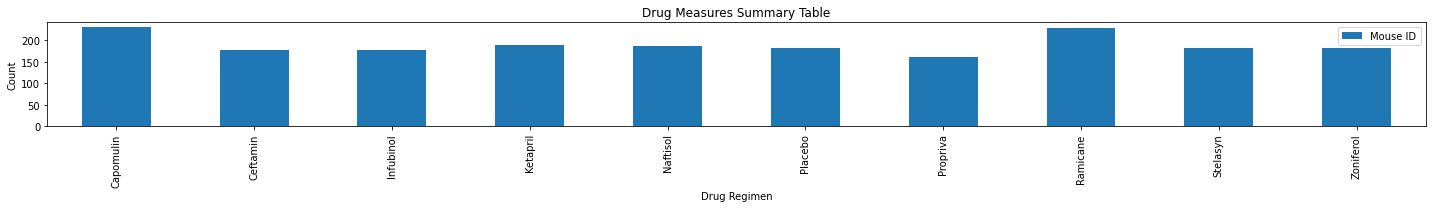

In [18]:
measures = drug_measures.plot(kind="bar", figsize=(20,3))
plt.title("Drug Measures Summary Table")

# Set the xlabel and ylabel
measures.set_xlabel("Drug Regimen")
measures.set_ylabel("Count")
plt.tight_layout()
plt.savefig("../figures/PandasBarChart.png")
plt.show

In [19]:
# Create a Matplotlib Bar Chart of the Drug Regimen Measures


<function matplotlib.pyplot.show(close=None, block=None)>

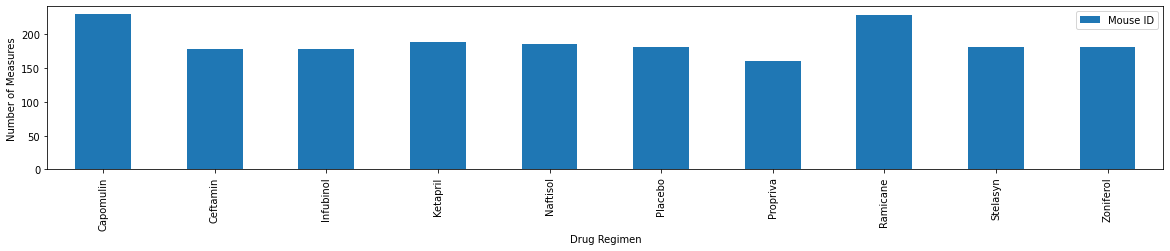

In [20]:
regimen_measures = drug_measures.plot(kind="bar", figsize=(20,3))
regimen_measures.set_xlabel("Drug Regimen")
regimen_measures.set_ylabel("Number of Measures")
plt.savefig("../figures/MatPlotLibBarChart.png")
plt.show

In [21]:
#Split data into gender groups
gender_groups = combined_study_data.groupby("Sex")

#Find the distribution of mice by gender
sex_mice = gender_groups.count()
sex_mice_id = sex_mice[["Mouse ID"]]
gender = ["Male", "Female"]
sex_mice_id

Mouse ID
Sex             
Female       935
Male         958

<function matplotlib.pyplot.show(close=None, block=None)>

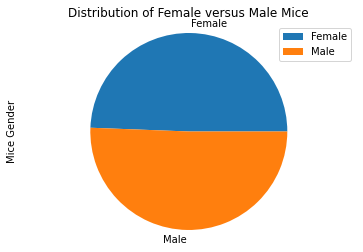

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = sex_mice.plot(kind="pie", y="Mouse ID", title=("Distribution of Female versus Male Mice"))
mice_gender.set_ylabel('Mice Gender')
plt.axis('equal')
plt.savefig('../figures/MatPlotLibPieChart.png')
plt.show


In [23]:
#Dataset
gender = ["Female", "Male"]
gender_count = [935, 958]
colors = ["lightcoral", "lightskyblue"]
explode = (0, 0.05)

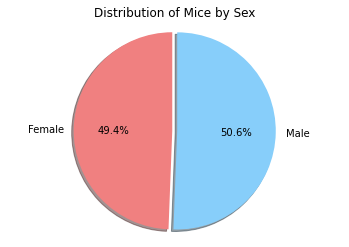

In [24]:


# Generate a pie plot showing the distribution of female versus male mice using MatPlotLib
plt.title("Distribution of Mice by Sex")
plt.pie(gender_count, explode=explode, labels=gender, colors=colors,
        autopct ="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.savefig('../figures/PandasPieChart.png')
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [26]:
#combined_study_data
promising_regimen_df = combined_study_data
#['Capomulin', 'Ramicane', 'Infubinal', 'Ceftamin']
promising_regimen_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [27]:
# Isolate the four Four most promising drug regimens by greating a list https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/index.html: Capomulin, Ramicane, Infubinol, and Ceftamin

promising_regimens = promising_regimen_df[['Mouse ID', 'Drug Regimen', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)']]


In [28]:
# Select the rows that contain ['Capomulin', 'Ramicane', 'Infubinal', 'Ceftamin']
promising_regimens['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
promising_regimens.head(20)


Mouse ID Drug Regimen  Weight (g)  Timepoint  Tumor Volume (mm3)
0      k403     Ramicane          16          0           45.000000
1      k403     Ramicane          16          5           38.825898
2      k403     Ramicane          16         10           35.014271
3      k403     Ramicane          16         15           34.223992
4      k403     Ramicane          16         20           32.997729
5      k403     Ramicane          16         25           33.464577
6      k403     Ramicane          16         30           31.099498
7      k403     Ramicane          16         35           26.546993
8      k403     Ramicane          16         40           24.365505
9      k403     Ramicane          16         45           22.050126
10     s185    Capomulin          17          0           45.000000
11     s185    Capomulin          17          5           43.878496
12     s185    Capomulin          17         10           37.614948
13     s185    Capomulin          17         15           38.177232
14     s185    Capomulin          17         20           36.866876
15     s185    Capomulin          17         25           33.949940
16     s185    Capomulin          17         30           32.959671
17     s185    Capomulin          17         35           28.328531
18     s185    Capomulin          17         40           25.472143
19     s185    Capomulin          17         45           23.343598

In [29]:
# Group data fram by drug regimen Capomulin: Thanks Ermias Gaga-ermiasgelaye
capomulin_df = promising_regimens.loc[promising_regimens['Drug Regimen'] == 'Capomulin']
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, promising_regimens, on=('Mouse ID', 'Timepoint'), how='left')
capomulin_merge.head()

Mouse ID  Timepoint Drug Regimen  Weight (g)  Tumor Volume (mm3)
0     b128         45    Capomulin          22           38.982878
1     b742         45    Capomulin          21           38.939633
2     f966         20    Capomulin          17           30.485985
3     g288         45    Capomulin          19           37.074024
4     g316         45    Capomulin          22           40.159220

In [30]:
# Group data fram by drug regimen Ramicane: Thanks Ermias Gaga-ermiasgelaye
ramicane_df = promising_regimens.loc[promising_regimens['Drug Regimen'] == 'Ramicane']
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, promising_regimens, on=('Mouse ID', 'Timepoint'), how='left')
ramicane_merge.head()

Mouse ID  Timepoint Drug Regimen  Weight (g)  Tumor Volume (mm3)
0     a411         45     Ramicane          22           38.407618
1     a444         45     Ramicane          25           43.047543
2     a520         45     Ramicane          21           38.810366
3     a644         45     Ramicane          17           32.978522
4     c458         30     Ramicane          20           38.342008

In [31]:
# Group data fram by drug regimen Infubinal: Thanks Ermias Gaga-ermiasgelaye
infubinol_df = promising_regimens.loc[promising_regimens['Drug Regimen'] == 'Infubinol']
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, promising_regimens, on=('Mouse ID', 'Timepoint'), how='left')
infubinol_merge.head()

Mouse ID  Timepoint Drug Regimen  Weight (g)  Tumor Volume (mm3)
0     a203         45    Infubinol          23           67.973419
1     a251         45    Infubinol          25           65.525743
2     a577         30    Infubinol          25           57.031862
3     a685         45    Infubinol          30           66.083066
4     c139         45    Infubinol          28           72.226731

In [32]:
# Group data fram by drug regimen Ceftamin: Thanks Ermias Gaga-ermiasgelaye
ceftamin_df = promising_regimens.loc[promising_regimens['Drug Regimen'] == 'Ceftamin']
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, promising_regimens, on=('Mouse ID', 'Timepoint'), how='left')
ceftamin_merge.head()

Mouse ID  Timepoint Drug Regimen  Weight (g)  Tumor Volume (mm3)
0     a275         45     Ceftamin          28           62.999356
1     b447          0     Ceftamin          30           45.000000
2     b487         25     Ceftamin          28           56.057749
3     b759         30     Ceftamin          25           55.742829
4     f436         15     Ceftamin          25           48.722078

In [33]:
# Calculate the Capomulin IQR and quantitatively determine if there are any potential outliers.
capomulin_tumors = capomulin_merge['Tumor Volume (mm3)']

quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
print(f'The lower quartile of Capomulin Tumours is: {lowerq}')
print(f'The upper quartile of Capomulin Tumours is: {upperq}')
print(f'The interquartile of Capomulin Tumours is: {iqr}')
print(f'The median of Capomulin Tumours is: {quartiles[0.5]}')
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
      
print(f'values below {lower_bound} could be outliers')
print(f'values above {upper_bound} could be outliers')
    

The lower quartile of Capomulin Tumours is: 32.37735684
The upper quartile of Capomulin Tumours is: 40.1592203
The interquartile of Capomulin Tumours is: 7.781863460000004
The median of Capomulin Tumours is: 38.125164399999996
values below 20.70456164999999 could be outliers
values above 51.83201549 could be outliers


In [34]:
# Calculate the Ramicane IQR and quantitatively determine if there are any potential outliers. : Thanks Ermias Gaga-ermiasgelaye
 
ramicane_tumors = ramicane_merge['Tumor Volume (mm3)']

quartiles = ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
print(f'The lower quartile of Ramicane Tumours is: {lowerq}')
print(f'The upper quartile of Ramicane Tumours is: {upperq}')
print(f'The interquartile of Ramicane Tumours is: {iqr}')
print(f'The median of Ramicane Tumours is: {quartiles[0.5]}')   
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
      
print(f'values below {lower_bound} could be outliers')
print(f'values above {upper_bound} could be outliers')
        

The lower quartile of Ramicane Tumours is: 31.56046955
The upper quartile of Ramicane Tumours is: 40.65900627
The interquartile of Ramicane Tumours is: 9.098536719999998
The median of Ramicane Tumours is: 36.56165229
values below 17.912664470000003 could be outliers
values above 54.30681135 could be outliers


In [35]:
# Calculate the Infubinal IQR and quantitatively determine if there are any potential outliers. : Thanks Ermias Gaga-ermiasgelaye

infubinol_tumors = infubinol_merge['Tumor Volume (mm3)']

quartiles = infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
print(f'The lower quartile of Infubinol Tumours is: {lowerq}')
print(f'The upper quartile of Infubinol Tumours is: {upperq}')
print(f'The interquartile of Infubinol Tumours is: {iqr}')
print(f'The median of Infubinol Tumours is: {quartiles[0.5]}')   
    
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
      
print(f'values below {lower_bound} could be outliers')
print(f'values above {upper_bound} could be outliers')  

The lower quartile of Infubinol Tumours is: 54.04860769
The upper quartile of Infubinol Tumours is: 65.52574285
The interquartile of Infubinol Tumours is: 11.477135160000003
The median of Infubinol Tumours is: 60.16518046
values below 36.83290494999999 could be outliers
values above 82.74144559000001 could be outliers


In [36]:
# Calculate the Ceftamin IQR and quantitatively determine if there are any potential outliers. : Thanks Ermias Gaga-ermiasgelaye

ceftamin_tumors = ceftamin_merge['Tumor Volume (mm3)']

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
print(f'The lower quartile of Ceftamin Tumours is: {lowerq}')
print(f'The upper quartile of Ceftamin Tumours is: {upperq}')
print(f'The interquartile of Ceftamin Tumours is: {iqr}')
print(f'The median of Ceftamin Tumours is: {quartiles[0.5]}')   
    
     
 # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
      
print(f'values below {lower_bound} could be outliers')
print(f'values above {upper_bound} could be outliers')     

The lower quartile of Ceftamin Tumours is: 48.72207785
The upper quartile of Ceftamin Tumours is: 64.29983003
The interquartile of Ceftamin Tumours is: 15.577752179999997
The median of Ceftamin Tumours is: 59.85195552
values below 25.355449580000002 could be outliers
values above 87.66645829999999 could be outliers


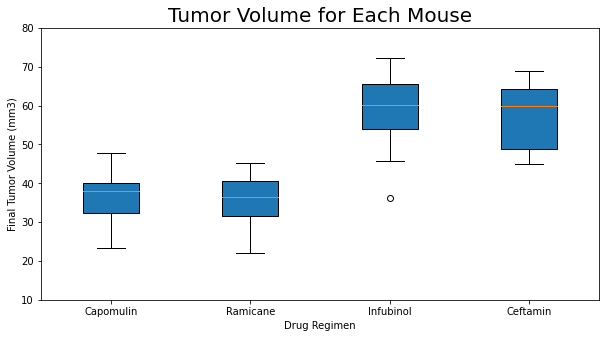

In [37]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_data = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
fig1, axl = plt.subplots(figsize=(10, 5))
axl.set_title('Tumor Volume for Each Mouse', fontsize = 20)
axl.set_ylabel('Final Tumor Volume (mm3)', fontsize = 10)
axl.set_xlabel('Drug Regimen', fontsize = 10)
axl.boxplot(box_plot_data, labels=drugs, widths =0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)
plt.savefig('../figures/boxplot.png')
plt.show()

## Line and Scatter Plots

In [38]:
# Create a DataFrame for a single mouse treated with Capomulin
line_df = capomulin_df.loc[capomulin_df ['Mouse ID'] == 's185'] 
line_df.head()

Mouse ID Drug Regimen  Weight (g)  Timepoint  Tumor Volume (mm3)
10     s185    Capomulin          17          0           45.000000
11     s185    Capomulin          17          5           43.878496
12     s185    Capomulin          17         10           37.614948
13     s185    Capomulin          17         15           38.177232
14     s185    Capomulin          17         20           36.866876

<function matplotlib.pyplot.show(close=None, block=None)>

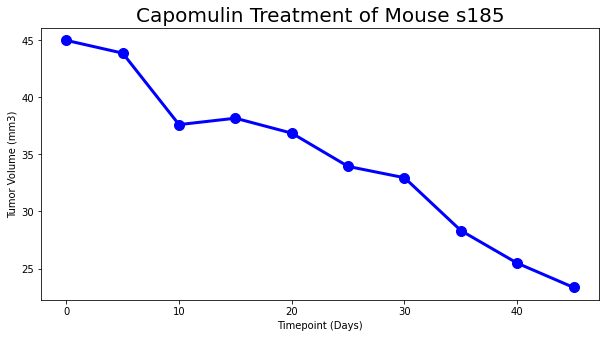

In [39]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = line_df['Timepoint']
tumor_size = line_df['Tumor Volume (mm3)']

fig1, axl = plt.subplots(figsize=(10, 5))
plt.title('Capomulin Treatment of Mouse s185', fontsize = 20)
plt.plot(x_axis, tumor_size,linewidth=3, markersize=10,marker='o',color='blue', label='Drug Regimen')
plt.xlabel('Timepoint (Days)', fontsize = 10)
plt.ylabel('Tumor Volume (mm3)', fontsize = 10)

plt.savefig('../figures/linegraph.png')
plt.show    

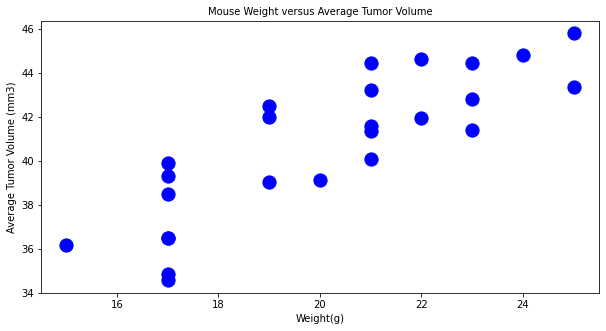

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, axl = plt.subplots(figsize=(10, 5))
avg_s185_val = capomulin_df.groupby(['Mouse ID']).mean()

markersize = 10
plt.scatter(avg_s185_val['Weight (g)'], avg_s185_val['Tumor Volume (mm3)'],s=175, color='blue')
plt.title('Mouse Weight versus Average Tumor Volume', fontsize = 10)
plt.xlabel('Weight(g)', fontsize = 10)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 10)

plt.savefig('../figures/Scatterplot.png')
plt.show()

## Correlation and Regression

In [41]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


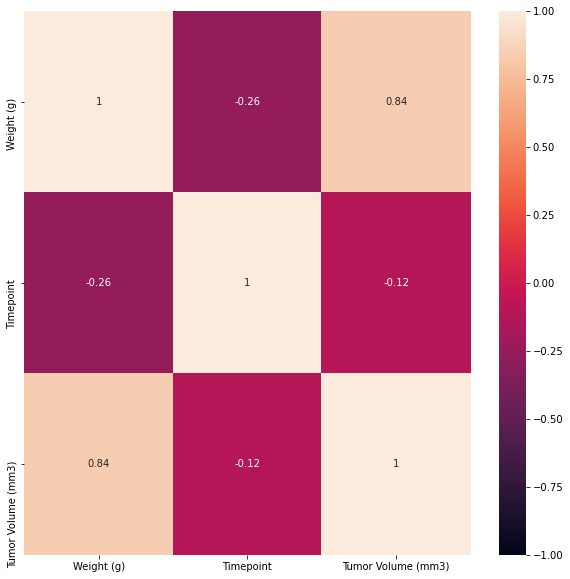

In [42]:
# Generate the correlation data frame
avg_s185_corr = avg_s185_val.corr()

# Plot the correlation data frame using seaborn heatmap
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(avg_s185_corr, annot=True,vmin=-1,vmax=1)
plt.savefig('../figures/correlation_heatmap.png')


In [43]:
# Compare thec alculated Pearson's r to the plot
correlation=round(st.pearsonr(avg_s185_val['Weight (g)'],avg_s185_val['Tumor Volume (mm3)']) [0],2)
print(f'The Correlation between Mouse Weight and Tumor Volume is {correlation}')


The Correlation between Mouse Weight and Tumor Volume is 0.84


The correlation between Mouse Weight (g) and Tumor Volume (mm3) is 0.84


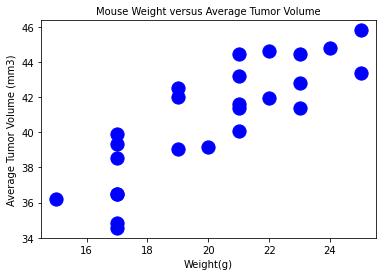

In [44]:
plt.scatter(avg_s185_val['Weight (g)'], avg_s185_val['Tumor Volume (mm3)'],s=175, color='blue')
plt.title('Mouse Weight versus Average Tumor Volume', fontsize = 10)
plt.xlabel('Weight(g)', fontsize = 10)
plt.ylabel('Average Tumor Volume (mm3)', fontsize = 10)
print(f'The correlation between Mouse Weight (g) and Tumor Volume (mm3) is {correlation}')
plt.savefig('../figures/Correlation_Scatterplot.png')
plt.show()

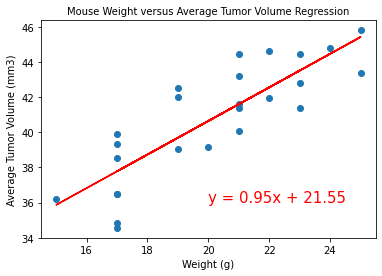

In [49]:
# Linear Regression
x_values = avg_s185_val['Weight (g)']
y_values = avg_s185_val['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# line_eq = f"y={slope:.2f}x{'+' if intercept > 0 else ''}{intercept:2f}"
line_eq = f"y = {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values, y_values)
plt.title('Mouse Weight versus Average Tumor Volume Regression', fontsize = 10)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('../figures/linearregression_MouseWeight_TumorVolume.png')
print()
plt.show()


The r-squared is 0.7088568047708717


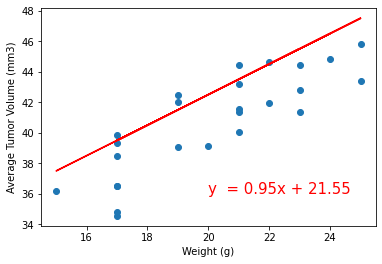

In [50]:
# Print out the r-squared value along with the plot
x_values = avg_s185_val['Weight (g)']
y_values = avg_s185_val['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values + slope + intercept
line_eq = "y  = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is {rvalue**2}")
plt.savefig('../figures/r-squared_MouseWeight_TumorVolume.png')
plt.show()

In [47]:
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pearsonsr (Correlation coefficient):{correlation}")
print(f"r-squared:{rvalue**2}")
print(f"stderr:{stderr}")
print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pearsonsr (Correlation coefficient):0.84
r-squared:0.7088568047708717
stderr:0.12754359033201337
y  = 0.95x + 21.55
